In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Import this package
from geots2img import ImageGenerator
from geots2img import generate_image_sequence, generate_video

In [22]:
pc_generation_df = pd.read_pickle('../swis_ts_data/pc_generation_df')

In [23]:
pc_generation_df.head()

,6000,6005,6006,6007,6008,6009,6010,6011,6014,6015,...,6324,6330,6391,6401,6426,6430,6432,6509,6528,6530
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-13 00:00:00+08:00,1.88,0.05,0.04,0.0,0.19,0.69,0.55,0.42,0.0,0.02,...,0.0,1.54,0.0,0.03,0.0,0.0,1.45,0.0,0.18,0.81
2020-02-13 01:00:00+08:00,1.90,0.05,0.06,0.0,0.19,0.40,0.43,0.23,0.0,0.02,...,0.0,1.47,0.0,0.03,0.0,0.0,1.44,0.0,0.15,0.81
2020-02-13 02:00:00+08:00,1.80,0.05,0.05,0.0,0.18,0.46,0.30,0.20,0.0,0.02,...,0.0,1.51,0.0,0.03,0.0,0.0,1.49,0.0,0.15,0.75
2020-02-13 03:00:00+08:00,1.93,0.05,0.05,0.0,0.19,0.12,0.73,0.23,0.0,0.03,...,0.0,1.50,0.0,0.04,0.0,0.0,1.53,0.0,0.39,0.66
2020-02-13 04:00:00+08:00,1.80,0.05,0.06,0.0,0.19,0.07,0.71,0.24,0.0,0.02,...,0.0,1.50,0.0,0.03,0.0,0.0,1.53,0.0,0.28,0.67


In [24]:
temp_df = pc_generation_df.reset_index()
solar_times = []

for val in temp_df['timestamp']:
    if val.hour >= 5 and val.hour <= 22:
        solar_times.append(True)
    else:
        solar_times.append(False)
temp_df['solar_time'] = solar_times
temp_df.head()

solar_df = temp_df.loc[temp_df['solar_time'] == True].set_index('timestamp')
solar_df = solar_df.drop(columns = ['solar_time'])

In [25]:
# Let's take this range for now

In [26]:
data = solar_df[:'2021-02-28 22:00:00']

In [27]:
data

,6000,6005,6006,6007,6008,6009,6010,6011,6014,6015,...,6324,6330,6391,6401,6426,6430,6432,6509,6528,6530
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-13 05:00:00+08:00,1.84,0.05,0.05,0.00,0.19,0.09,0.57,0.23,0.00,0.03,...,0.00,1.51,0.00,0.03,0.00,0.00,1.54,0.00,0.28,0.59
2020-02-13 06:00:00+08:00,1.89,0.05,0.06,0.00,0.19,0.05,0.56,0.22,0.00,0.02,...,0.00,1.50,0.00,0.03,0.00,0.00,1.52,0.00,0.27,0.64
2020-02-13 07:00:00+08:00,1.88,0.05,0.05,0.00,0.18,0.22,0.59,0.22,0.00,0.02,...,0.00,1.49,0.00,0.03,0.00,0.00,1.50,0.00,0.17,0.51
2020-02-13 08:00:00+08:00,1.89,0.05,0.23,0.00,0.21,0.16,0.30,0.19,0.00,0.02,...,0.27,5.51,0.05,0.04,0.03,11.18,33.24,0.10,0.25,0.61
2020-02-13 09:00:00+08:00,9.89,89.77,204.14,6.94,215.10,30.62,148.68,41.98,48.13,10.74,...,28.79,370.52,8.36,98.85,5.72,327.16,764.49,96.60,15.84,254.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28 18:00:00+08:00,385.00,1577.36,3499.68,158.53,4192.57,911.74,1664.19,1267.89,1540.87,121.85,...,137.70,1399.19,183.42,1691.42,134.18,1311.97,5687.92,630.33,435.56,3835.55
2021-02-28 19:00:00+08:00,253.98,1222.67,2074.44,93.45,3265.15,585.39,1248.60,1054.62,1255.47,64.33,...,100.52,690.49,118.57,931.57,95.23,581.45,3185.92,440.57,206.54,1914.58
2021-02-28 20:00:00+08:00,95.95,419.53,765.74,42.77,1127.87,235.43,450.23,373.85,469.02,37.04,...,77.13,393.81,71.12,473.72,23.84,99.95,1101.51,188.04,99.59,793.43


In [10]:
data.to_pickle('../swis_ts_data/ts_image')

In [28]:
# SWIS
LAT_RANGE = [-36.05, -26.5]
LON_RANGE = [113.8, 122.4]

GEO_RES = 0.0005

In [29]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(data.to_numpy().reshape(-1,1)) 
data.loc[:,:] = scaled_values.reshape(len(data), -1)

/Users/pereramg/pythonenv/deeplearning/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/pereramg/pythonenv/deeplearning/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [30]:
data

,6000,6005,6006,6007,6008,6009,6010,6011,6014,6015,...,6324,6330,6391,6401,6426,6430,6432,6509,6528,6530
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-13 05:00:00+08:00,0.000054,0.000001,0.000001,0.000000,0.000006,0.000003,0.000017,0.000007,0.000000e+00,8.731543e-07,...,0.000000,0.000044,0.000000,8.731543e-07,0.000000e+00,0.000000,0.000045,0.000000e+00,0.000008,0.000017
2020-02-13 06:00:00+08:00,0.000055,0.000001,0.000002,0.000000,0.000006,0.000001,0.000016,0.000006,0.000000e+00,5.821028e-07,...,0.000000,0.000044,0.000000,8.731543e-07,0.000000e+00,0.000000,0.000044,0.000000e+00,0.000008,0.000019
2020-02-13 07:00:00+08:00,0.000055,0.000001,0.000001,0.000000,0.000005,0.000006,0.000017,0.000006,0.000000e+00,5.821028e-07,...,0.000000,0.000043,0.000000,8.731543e-07,0.000000e+00,0.000000,0.000044,0.000000e+00,0.000005,0.000015
2020-02-13 08:00:00+08:00,0.000055,0.000001,0.000007,0.000000,0.000006,0.000005,0.000009,0.000006,0.000000e+00,5.821028e-07,...,0.000008,0.000160,0.000001,1.164206e-06,8.731543e-07,0.000325,0.000967,2.910514e-06,0.000007,0.000018
2020-02-13 09:00:00+08:00,0.000288,0.002613,0.005942,0.000202,0.006261,0.000891,0.004327,0.001222,1.400830e-03,3.125892e-04,...,0.000838,0.010784,0.000243,2.877043e-03,1.664814e-04,0.009522,0.022251,2.811557e-03,0.000461,0.007400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28 18:00:00+08:00,0.011205,0.045909,0.101859,0.004614,0.122025,0.026536,0.048436,0.036902,4.484724e-02,3.546462e-03,...,0.004008,0.040724,0.005338,4.922902e-02,3.905328e-03,0.038185,0.165548,1.834584e-02,0.012677,0.111634
2021-02-28 19:00:00+08:00,0.007392,0.035586,0.060377,0.002720,0.095033,0.017038,0.036341,0.030695,3.654063e-02,1.872334e-03,...,0.002926,0.020097,0.003451,2.711348e-02,2.771683e-03,0.016923,0.092727,1.282285e-02,0.006011,0.055724
2021-02-28 20:00:00+08:00,0.002793,0.012210,0.022287,0.001245,0.032827,0.006852,0.013104,0.010881,1.365089e-02,1.078054e-03,...,0.002245,0.011462,0.002070,1.378769e-02,6.938666e-04,0.002909,0.032060,5.472931e-03,0.002899,0.023093


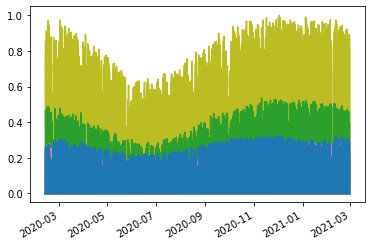

In [31]:
ax = data.plot(legend=False, xlabel="");
fig = ax.get_figure()

In [32]:
# Let's also store the postcodes for convenience
postcodes = list(data.columns)

In [33]:
int_pc = []
for pc in postcodes:
    int_pc.append(int(pc))

In [34]:
coordinate_info = pd.read_csv('../swis_ts_data/coordinate_mapping.csv', index_col = 0)
swis_coordinate_info = coordinate_info.loc[coordinate_info['index'].isin(int_pc)][['index', 'google_lat_lon']]
swis_coordinate_info['lat'] = [float(coord.split(',')[0]) for coord in swis_coordinate_info['google_lat_lon']]
swis_coordinate_info['lon'] = [float(coord.split(',')[1]) for coord in swis_coordinate_info['google_lat_lon']]
swis_coordinate_info.head()

,index,google_lat_lon,lat,lon
0,6000,"-31.950381597474344, 115.86412410011953",-31.950382,115.864124
3,6005,"-31.95816075348317, 115.83588049074635",-31.958161,115.835880
4,6006,"-31.92892961012436, 115.85414408177151",-31.928930,115.854144
5,6007,"-31.93672156044384, 115.83634153727863",-31.936722,115.836342
8,6008,"-31.955144913492568, 115.81545770663665",-31.955145,115.815458


In [35]:
latlons = swis_coordinate_info.drop(columns = ['google_lat_lon'])

In [36]:
latlons = latlons.rename(columns = {'index': 'postcode'})

In [37]:
latlons.set_index('postcode', inplace = True)

In [38]:
latlons['lat']

postcode
6000   -31.950382
6005   -31.958161
6006   -31.928930
6007   -31.936722
6008   -31.955145
          ...    
6430   -30.757858
6432   -30.783006
6509   -30.969028
6528   -28.971262
6530   -28.781062
Name: lat, Length: 101, dtype: float64

In [39]:
latlons.to_pickle('../swis_ts_data/latlons')

In [40]:
# The interval for which to generate an image
from dateutil import parser
DATETIME = parser.parse('2020-11-01 12:00:00+08:00')

In [41]:
# Generate lists of source data points and values
source_points = []
source_values = []
for pc in postcodes:
#     print(pc)
    [lon, lat] = latlons.loc[int(pc), ['lon', 'lat']]
    value = data.loc[DATETIME, pc]
    source_points.append((lon, lat))
    source_values.append(value)

# Display five example points and values
print(source_points[5:10])
print(source_values[5:10])

[(115.80649401877928, -31.98545958419465), (115.77349423948644, -31.971699257536777), (115.75931084000678, -31.993597292741228), (115.80672212062471, -31.937710366118203), (115.76299470591694, -31.934854932829836)]
[0.013048708328349076, 0.024513514827178028, 0.015920221641477623, 0.018685792237600408, 0.002855505485009542]


In [45]:
# Create geots2img image generator object
image_gen = ImageGenerator(LON_RANGE, LAT_RANGE, GEO_RES)

In [46]:
# Set the source points and values
image_gen.set_source_points(source_points)

In [47]:
image_gen.set_source_values(source_values)

In [ ]:
# Generate the image
image_gen.generate_image()

In [ ]:
# Display the image
image_gen.image

In [43]:
source_values

[0.006800125384951884,
 0.015746463943531366,
 0.03883033419397238,
 0.0024142715317657885,
 0.05649482699758049,
 0.013048708328349076,
 0.024513514827178028,
 0.015920221641477623,
 0.018685792237600408,
 0.002855505485009542,
 0.021988352704260614,
 0.010654519344587127,
 0.009093028474433607,
 0.006172909574107367,
 0.056342607104739796,
 0.0064741477941649426,
 0.022838804954510118,
 0.0049624267168905,
 0.001234931176525888,
 0.03668703153454825,
 0.0038596328852014616,
 0.006548074854932695,
 0.0029681423846832445,
 0.006843783098003707,
 0.0063129053072935445,
 0.0033892937899231597,
 0.00376242171080607,
 0.00741395283046051,
 0.019835736399385413,
 0.006578926305489317,
 0.010748528953358719,
 0.006232866166698536,
 0.003313038317792643,
 0.01015944087857946,
 0.005759616557216779,
 0.004601231904241754,
 0.002471026558733158,
 0.011698811840786723,
 0.20421564698256806,
 0.008891038788713841,
 0.005077974130767657,
 0.002119727494376159,
 0.006973592031477793,
 0.00942366288